<a href="https://colab.research.google.com/github/Ravindharnath/Miniprojects/blob/main/Mini_project_1_HR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import csv
import re
import traceback
from tabulate import tabulate
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from IPython.core.interactiveshell import InteractiveShell # Capitalize 'I' in 'IPython'
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
import pandas as pd
df = pd.read_csv("/content/Copy of HR_comma_sep.csv")
df.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


How many employees in each of the department (use column "sales")

In [ ]:
department_employee_count = df.groupby('sales').size().reset_index(name='num_employees')
department_employee_count.insert(0, 'Serial No', range(1, len(department_employee_count) + 1))
print("Department-wise Employee Count")
print(tabulate(department_employee_count, headers='keys', tablefmt='grid', showindex=False))


Department-wise Employee Count
+-------------+-------------+-----------------+
|   Serial No | sales       |   num_employees |
+=============+=============+=================+
|           1 | IT          |            1227 |
+-------------+-------------+-----------------+
|           2 | RandD       |             787 |
+-------------+-------------+-----------------+
|           3 | accounting  |             767 |
+-------------+-------------+-----------------+
|           4 | hr          |             739 |
+-------------+-------------+-----------------+
|           5 | management  |             630 |
+-------------+-------------+-----------------+
|           6 | marketing   |             858 |
+-------------+-------------+-----------------+
|           7 | product_mng |             902 |
+-------------+-------------+-----------------+
|           8 | sales       |            4140 |
+-------------+-------------+-----------------+
|           9 | support     |            2229 |
+--------

In [ ]:
left_employees_department = df[df['left'] == 1].groupby('sales').size().reset_index(name='num_employees')
left_employees_department['rank'] = left_employees_department['num_employees'].rank(ascending=False)
left_employees_department.insert(0, 'Serial No', range(1, len(left_employees_department) + 1))
print("\nDepartment-wise Employee Count of Employees Who Left and Their Rank")
print(tabulate(left_employees_department, headers='keys', tablefmt='grid', showindex=False))


Department-wise Employee Count of Employees Who Left and Their Rank
+-------------+-------------+-----------------+--------+
|   Serial No | sales       |   num_employees |   rank |
+=============+=============+=================+========+
|           1 | IT          |             273 |      4 |
+-------------+-------------+-----------------+--------+
|           2 | RandD       |             121 |      9 |
+-------------+-------------+-----------------+--------+
|           3 | accounting  |             204 |      6 |
+-------------+-------------+-----------------+--------+
|           4 | hr          |             215 |      5 |
+-------------+-------------+-----------------+--------+
|           5 | management  |              91 |     10 |
+-------------+-------------+-----------------+--------+
|           6 | marketing   |             203 |      7 |
+-------------+-------------+-----------------+--------+
|           7 | product_mng |             198 |      8 |
+-------------+----

In [ ]:

avg_time_hours = df.groupby(['sales', 'left']).agg(
    avg_time_spend_company=('time_spend_company', 'mean'),
    avg_average_monthly_hours=('average_montly_hours', 'mean')
).reset_index()
heatmap_data = avg_time_hours.pivot(index='sales', columns='left', values=['avg_time_spend_company', 'avg_average_monthly_hours'])

heatmap_data_reset = heatmap_data.reset_index()

heatmap_data_reset.insert(0, 'Serial No', range(1, len(heatmap_data_reset) + 1))

print("\nHeatmap Data for Average Time Spent and Monthly Hours by Department and Left Status")
print(tabulate(heatmap_data_reset, headers='keys', tablefmt='grid', showindex=False))



Heatmap Data for Average Time Spent and Monthly Hours by Department and Left Status
+---------------------+-----------------+---------------------------------+---------------------------------+------------------------------------+------------------------------------+
|   ('Serial No', '') | ('sales', '')   |   ('avg_time_spend_company', 0) |   ('avg_time_spend_company', 1) |   ('avg_average_monthly_hours', 0) |   ('avg_average_monthly_hours', 1) |
+=====================+=================+=================================+=================================+====================================+====================================+
|                   1 | IT              |                         3.35639 |                         3.86081 |                            198.887 |                            213.85  |
+---------------------+-----------------+---------------------------------+---------------------------------+------------------------------------+---------------------------------

In [ ]:
accident_promotion_stats = df.groupby(["left", "sales"]).agg(
    count_work_accident=("Work_accident", "sum"),
    count_promotion_last_5years=("promotion_last_5years", "sum")
).reset_index()


accident_promotion_stats_sorted = accident_promotion_stats.sort_values(by="sales")

accident_promotion_stats_sorted.insert(0, 'Serial No', range(1, len(accident_promotion_stats_sorted) + 1))


print("\nCount of Work Accidents and Promotions by Department and Left Status")
print(tabulate(accident_promotion_stats_sorted, headers='keys', tablefmt='grid', showindex=False))



Count of Work Accidents and Promotions by Department and Left Status
+-------------+--------+-------------+-----------------------+-------------------------------+
|   Serial No |   left | sales       |   count_work_accident |   count_promotion_last_5years |
+=============+========+=============+=======================+===============================+
|           1 |      0 | IT          |                   155 |                             0 |
+-------------+--------+-------------+-----------------------+-------------------------------+
|           2 |      1 | IT          |                     9 |                             3 |
+-------------+--------+-------------+-----------------------+-------------------------------+
|           3 |      0 | RandD       |                   124 |                            27 |
+-------------+--------+-------------+-----------------------+-------------------------------+
|           4 |      1 | RandD       |                    10 |             

In [ ]:
eval_satisfaction_stats = df.groupby(["sales", "left"]).agg(
    min_last_evaluation=("last_evaluation", "min"),
    max_last_evaluation=("last_evaluation", "max"),
    avg_last_evaluation=("last_evaluation", "mean"),
    min_satisfaction_level=("satisfaction_level", "min"),
    max_satisfaction_level=("satisfaction_level", "max"),
    avg_satisfaction_level=("satisfaction_level", "mean")
).reset_index()

eval_satisfaction_stats_sorted = eval_satisfaction_stats.sort_values(by="sales")

eval_satisfaction_stats_sorted.insert(0, 'Serial No', range(1, len(eval_satisfaction_stats_sorted) + 1))


print("\nEvaluation and Satisfaction Statistics by Department and Left Status")
print(tabulate(eval_satisfaction_stats_sorted, headers='keys', tablefmt='grid', showindex=False))


Evaluation and Satisfaction Statistics by Department and Left Status
+-------------+-------------+--------+-----------------------+-----------------------+-----------------------+--------------------------+--------------------------+--------------------------+
|   Serial No | sales       |   left |   min_last_evaluation |   max_last_evaluation |   avg_last_evaluation |   min_satisfaction_level |   max_satisfaction_level |   avg_satisfaction_level |
+=============+=============+========+=======================+=======================+=======================+==========================+==========================+==========================+
|           1 | IT          |      0 |                  0.37 |                     1 |              0.71305  |                     0.12 |                     1    |                 0.67717  |
+-------------+-------------+--------+-----------------------+-----------------------+-----------------------+--------------------------+-------------------------

In [ ]:
min_max_time_hours = df.groupby(["left", "sales"]).agg(
    min_time_spend_company=("time_spend_company", "min"),
    max_time_spend_company=("time_spend_company", "max"),
    min_average_montly_hours=("average_montly_hours", "min"),
    max_average_montly_hours=("average_montly_hours", "max")
).reset_index()


min_max_time_hours_sorted = min_max_time_hours.sort_values(by="sales")

min_max_time_hours_sorted.insert(0, 'Serial No', range(1, len(min_max_time_hours_sorted) + 1))

print("\nMinimum and Maximum Time Spent and Monthly Hours by Department and Left Status")
print(tabulate(min_max_time_hours_sorted, headers='keys', tablefmt='grid', showindex=False))



Minimum and Maximum Time Spent and Monthly Hours by Department and Left Status
+-------------+--------+-------------+--------------------------+--------------------------+----------------------------+----------------------------+
|   Serial No |   left | sales       |   min_time_spend_company |   max_time_spend_company |   min_average_montly_hours |   max_average_montly_hours |
+=============+========+=============+==========================+==========================+============================+============================+
|           1 |      0 | IT          |                        2 |                       10 |                         96 |                        287 |
+-------------+--------+-------------+--------------------------+--------------------------+----------------------------+----------------------------+
|           2 |      1 | IT          |                        2 |                        6 |                        127 |                        308 |
+-------------

In [ ]:
eval_satisfaction_stats = df.groupby(["left", "sales"]).agg(
    min_last_evaluation=("last_evaluation", "min"),
    max_last_evaluation=("last_evaluation", "max"),
    avg_last_evaluation=("last_evaluation", "mean"),
    min_satisfaction_level=("satisfaction_level", "min"),
    max_satisfaction_level=("satisfaction_level", "max"),
    avg_satisfaction_level=("satisfaction_level", "mean")
).reset_index()

# Sort by 'sales'
eval_satisfaction_stats_sorted = eval_satisfaction_stats.sort_values(by="sales")

# Add serial number column
eval_satisfaction_stats_sorted.insert(0, 'Serial No', range(1, len(eval_satisfaction_stats_sorted) + 1))

# Print the table with a dotted line
print("\nEvaluation and Satisfaction Statistics by Department and Left Status")
print(tabulate(eval_satisfaction_stats_sorted, headers='keys', tablefmt='grid', showindex=False))


Evaluation and Satisfaction Statistics by Department and Left Status
+-------------+--------+-------------+-----------------------+-----------------------+-----------------------+--------------------------+--------------------------+--------------------------+
|   Serial No |   left | sales       |   min_last_evaluation |   max_last_evaluation |   avg_last_evaluation |   min_satisfaction_level |   max_satisfaction_level |   avg_satisfaction_level |
+=============+========+=============+=======================+=======================+=======================+==========================+==========================+==========================+
|           1 |      0 | IT          |                  0.37 |                     1 |              0.71305  |                     0.12 |                     1    |                 0.67717  |
+-------------+--------+-------------+-----------------------+-----------------------+-----------------------+--------------------------+-------------------------

In [ ]:
min_max_time_hours = df.groupby(["left", "sales"]).agg(
    min_time_spend_company=("time_spend_company", "min"),
    max_time_spend_company=("time_spend_company", "max"),
    min_average_montly_hours=("average_montly_hours", "min"),
    max_average_montly_hours=("average_montly_hours", "max")
).reset_index()

# Sort the results by 'sales'
min_max_time_hours_sorted = min_max_time_hours.sort_values(by="sales")

# Add serial number column
min_max_time_hours_sorted.insert(0, 'Serial No', range(1, len(min_max_time_hours_sorted) + 1))

print("\nMinimum and Maximum Time Spent and Monthly Hours by Department and Left Status")
print(tabulate(min_max_time_hours_sorted, headers='keys', tablefmt='grid', showindex=False))



Minimum and Maximum Time Spent and Monthly Hours by Department and Left Status
+-------------+--------+-------------+--------------------------+--------------------------+----------------------------+----------------------------+
|   Serial No |   left | sales       |   min_time_spend_company |   max_time_spend_company |   min_average_montly_hours |   max_average_montly_hours |
+=============+========+=============+==========================+==========================+============================+============================+
|           1 |      0 | IT          |                        2 |                       10 |                         96 |                        287 |
+-------------+--------+-------------+--------------------------+--------------------------+----------------------------+----------------------------+
|           2 |      1 | IT          |                        2 |                        6 |                        127 |                        308 |
+-------------

In [ ]:
avg_time_hours_sorted = df.groupby(["left", "sales"]).agg(
    avg_time_spend_company=("time_spend_company", "mean"),
    avg_average_montly_hours=("average_montly_hours", "mean")
).reset_index().sort_values(by="sales")

min_max_time_hours_sorted = df.groupby(["left", "sales"]).agg(
    min_time_spend_company=("time_spend_company", "min"),
    max_time_spend_company=("time_spend_company", "max"),
    min_average_montly_hours=("average_montly_hours", "min"),
    max_average_montly_hours=("average_montly_hours", "max")
).reset_index().sort_values(by="sales")
eval_satisfaction_stats_sorted = df.groupby(["left", "sales"]).agg(
    min_last_evaluation=("last_evaluation", "min"),
    max_last_evaluation=("last_evaluation", "max"),
    avg_last_evaluation=("last_evaluation", "mean"),
    min_satisfaction_level=("satisfaction_level", "min"),
    max_satisfaction_level=("satisfaction_level", "max"),
    avg_satisfaction_level=("satisfaction_level", "mean")
).reset_index().sort_values(by="sales")

accident_promotion_stats_sorted = df.groupby(["left", "sales"]).agg(
    count_work_accident=("Work_accident", "sum"),
    count_promotion_last_5years=("promotion_last_5years", "sum")
).reset_index().sort_values(by="sales")

# Merging data frames
merged_results = pd.merge(avg_time_hours_sorted, min_max_time_hours_sorted, on=["left", "sales"])
merged_results = pd.merge(merged_results, eval_satisfaction_stats_sorted, on=["left", "sales"])
merged_results = pd.merge(merged_results, accident_promotion_stats_sorted, on=["left", "sales"])

# Add serial number column
merged_results.insert(0, 'Serial No', range(1, len(merged_results) + 1))

# Print the table with grid lines
print("\nMerged Results Table")
print(tabulate(merged_results, headers='keys', tablefmt='grid', showindex=False))



Merged Results Table
+-------------+--------+-------------+--------------------------+----------------------------+--------------------------+--------------------------+----------------------------+----------------------------+-----------------------+-----------------------+-----------------------+--------------------------+--------------------------+--------------------------+-----------------------+-------------------------------+
|   Serial No |   left | sales       |   avg_time_spend_company |   avg_average_montly_hours |   min_time_spend_company |   max_time_spend_company |   min_average_montly_hours |   max_average_montly_hours |   min_last_evaluation |   max_last_evaluation |   avg_last_evaluation |   min_satisfaction_level |   max_satisfaction_level |   avg_satisfaction_level |   count_work_accident |   count_promotion_last_5years |
+=============+========+=============+==========================+============================+==========================+=========================

<Figure size 1400x800 with 0 Axes>

<Axes: xlabel='sales', ylabel='avg_time_spend_company'>

Text(0.5, 0, 'Department')

Text(0, 0.5, 'Average Time Spent in Company')

Text(0.5, 1.0, 'Average Time Spent in Company by Department (Left vs Not Left)')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'IT'),
  Text(1, 0, 'RandD'),
  Text(2, 0, 'accounting'),
  Text(3, 0, 'hr'),
  Text(4, 0, 'management'),
  Text(5, 0, 'marketing'),
  Text(6, 0, 'product_mng'),
  Text(7, 0, 'sales'),
  Text(8, 0, 'support'),
  Text(9, 0, 'technical')])

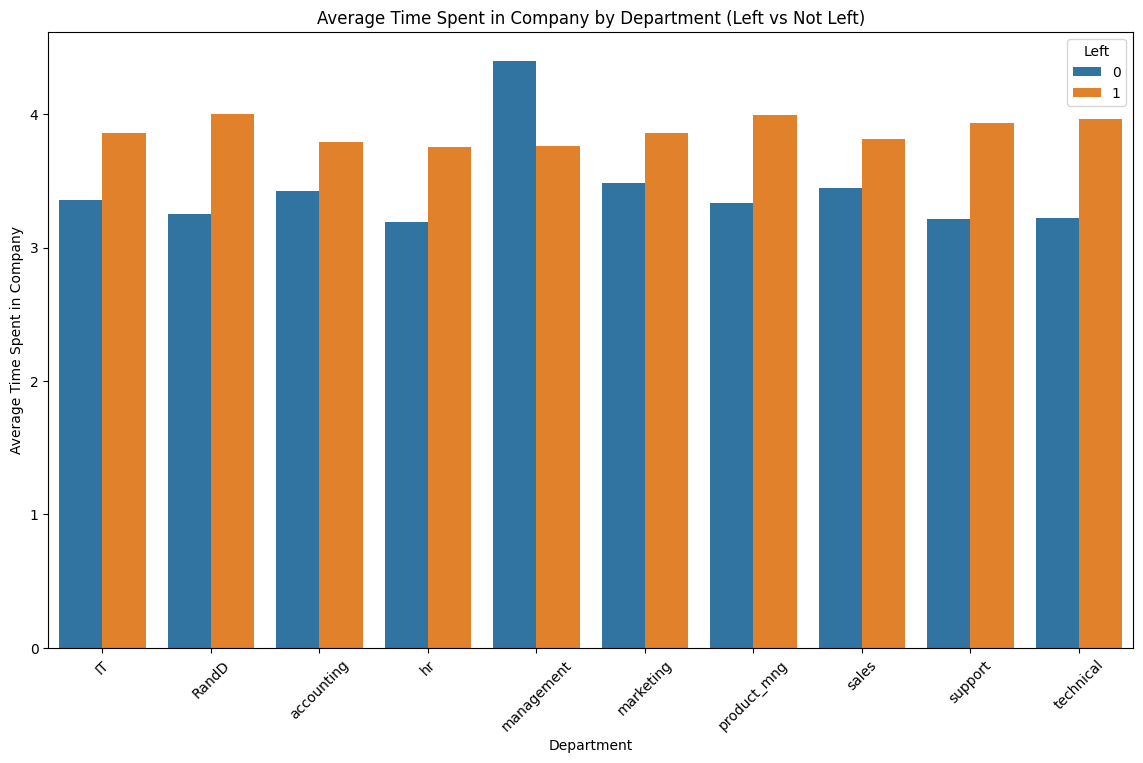

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure avg_time_hours_sorted DataFrame has the required columns: 'sales', 'avg_time_spend_company', 'left'

# Create the grouped bar chart
plt.figure(figsize=(14, 8))
sns.barplot(x='sales', y='avg_time_spend_company', hue='left', data=avg_time_hours_sorted)

# Set labels and title
plt.xlabel('Department')
plt.ylabel('Average Time Spent in Company')
plt.title('Average Time Spent in Company by Department (Left vs Not Left)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add legend
plt.legend(title='Left')

# Display the plot
plt.show()

<Figure size 1200x800 with 0 Axes>

<Axes: >

<Axes: xlabel='left', ylabel='sales'>

Text(0.5, 1.0, 'Average Time Spent in Company')

Text(0.5, 58.7222222222222, 'Left')

Text(120.58159722222221, 0.5, 'Department')

<Axes: >

<Axes: xlabel='left', ylabel='sales'>

Text(0.5, 1.0, 'Average Monthly Hours')

Text(0.5, 58.7222222222222, 'Left')

Text(627.8543244949494, 0.5, 'Department')

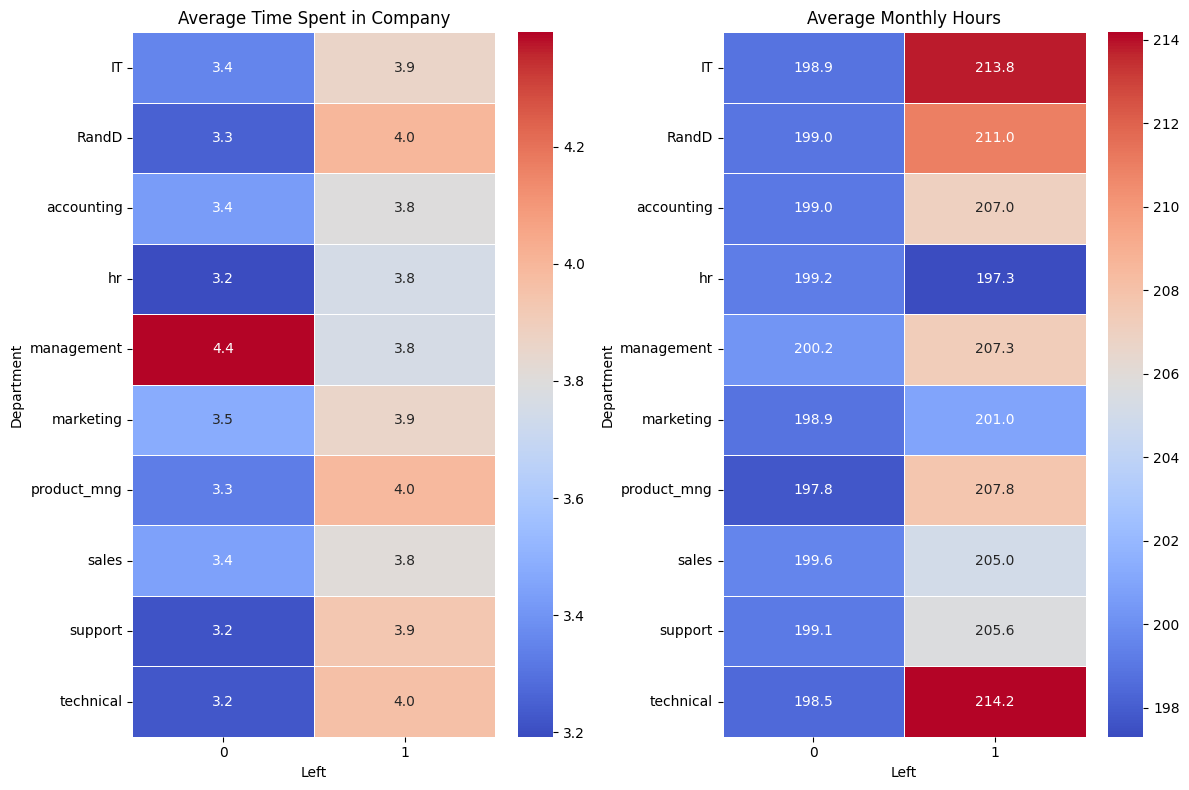

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

avg_time_hours = df.groupby(["left", "sales"]).agg(
    avg_time_spend_company=("time_spend_company", "mean"),
    avg_average_montly_hours=("average_montly_hours", "mean")
).reset_index()

# Pivot table for heatmap
heatmap_data = avg_time_hours.pivot(index='sales', columns='left', values=['avg_time_spend_company', 'avg_average_montly_hours'])

# Plot heatmap
plt.figure(figsize=(12, 8))

# Plot avg_time_spend_company
plt.subplot(1, 2, 1)
sns.heatmap(heatmap_data['avg_time_spend_company'], annot=True, cmap='coolwarm', fmt=".1f", linewidths=0.5)
plt.title('Average Time Spent in Company')
plt.xlabel('Left')
plt.ylabel('Department')

# Plot avg_average_montly_hours
plt.subplot(1, 2, 2)
sns.heatmap(heatmap_data['avg_average_montly_hours'], annot=True, cmap='coolwarm', fmt=".1f", linewidths=0.5)
plt.title('Average Monthly Hours')
plt.xlabel('Left')
plt.ylabel('Department')

plt.tight_layout()
plt.show()